<a href="https://colab.research.google.com/github/mohdtanweer/TensorFlowSpecialisation/blob/master/Convolution_Neural_Networks_In_TensorFlow/Week4/Exercise_4_Multi_class_classifier_Question_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
import os
os.listdir('/content/gdrive/My Drive/TensorFlowSpecialisation/Convolution_Neural_Networks_In_TensorFlow/data')

['horse-or-human.zip',
 'validation-horse-or-human.zip',
 'rps.zip',
 'rps-test-set.zip',
 'rps-validation.zip',
 'sign_mnist_test.csv',
 'sign_mnist_train.csv']

In [5]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
        reader = csv.reader(training_file, delimiter=',')    
        imgs = []
        labels = []

        next(reader, None)
        
        for row in reader:
            label = row[0]
            data = row[1:]
            img = np.array(data).reshape((28, 28))

            imgs.append(img)
            labels.append(label)

        images = np.array(imgs).astype(float)
        labels = np.array(labels).astype(float)
      # Your code ends here
    return images, labels

path_sign_mnist_train = "/content/gdrive/My Drive/TensorFlowSpecialisation/Convolution_Neural_Networks_In_TensorFlow/data/sign_mnist_train.csv"
path_sign_mnist_test = "/content/gdrive/My Drive/TensorFlowSpecialisation/Convolution_Neural_Networks_In_TensorFlow/data/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [6]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3) # Your Code Here
testing_images = np.expand_dims(testing_images, axis=3) # Your Code Here

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    # Your Code Here
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(
    ImageDataGenerator(rescale = 1./255))
    # Your Code Here)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [7]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
    # Your Code Here
])

# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Configure generators
train_generator = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=64
)

validation_generator = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=64
)


# Train the Model
history = model.fit_generator(train_generator, 
                              epochs=15,  
                              validation_data = validation_generator
                              )# Your Code Here (do not set epochs > 15))

model.evaluate(testing_images, testing_labels, verbose=0)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
429/429 [==============================] - ETA: 0s - loss: 2.8146 - accuracy: 0.1486

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


429/429 [==============================] - 12s 28ms/step - loss: 2.8146 - accuracy: 0.1486 - val_loss: 217.2782 - val_accuracy: 0.2131
Epoch 2/15
429/429 [==============================] - 12s 28ms/step - loss: 2.0823 - accuracy: 0.3461 - val_loss: 201.2393 - val_accuracy: 0.3218
Epoch 3/15
429/429 [==============================] - 12s 28ms/step - loss: 1.6845 - accuracy: 0.4619 - val_loss: 223.8656 - val_accuracy: 0.4059
Epoch 4/15
429/429 [==============================] - 12s 27ms/step - loss: 1.4324 - accuracy: 0.5358 - val_loss: 238.0326 - val_accuracy: 0.4498
Epoch 5/15
429/429 [==============================] - 12s 27ms/step - loss: 1.2461 - accuracy: 0.5904 - val_loss: 189.9426 - val_accuracy: 0.5208
Epoch 6/15
429/429 [==============================] - 12s 27ms/step - loss: 1.1124 - accuracy: 0.6377 - val_loss: 218.0060 - val_accuracy: 0.5107
Epoch 7/15
429/429 [==============================] - 12s 27ms/step - loss: 0.9800 - accuracy: 0.6794 - val_loss: 254.4802 - val_accura

[193.63983154296875, 0.6345510482788086]

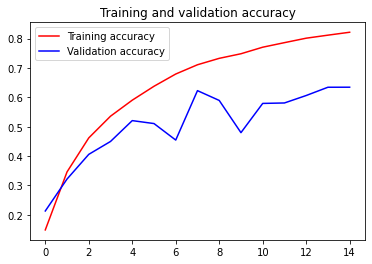

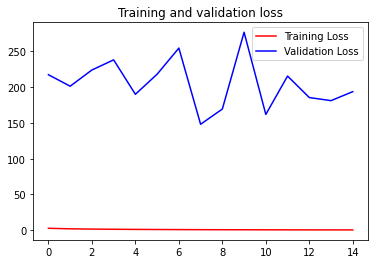

In [8]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy'] # Your Code Here
val_acc = history.history['val_accuracy'] # Your Code Here
loss = history.history['loss'] # Your Code Here
val_loss = history.history['val_loss'] # Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

<IPython.core.display.Javascript object>